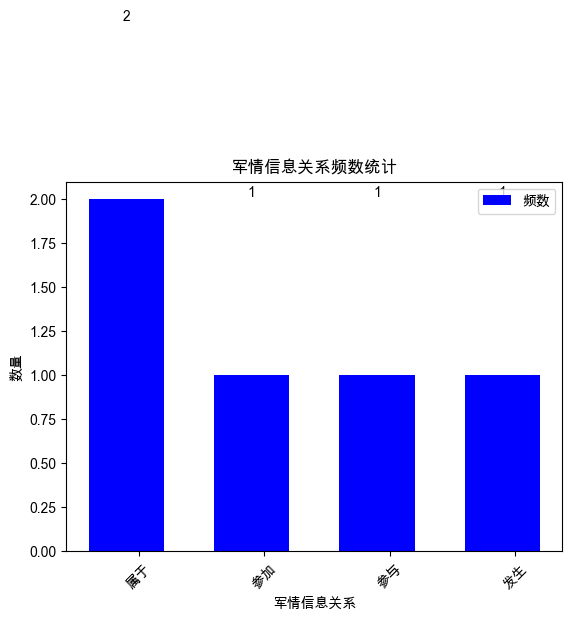

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取EXCEL数据
df = pd.read_csv('data.csv')
label_list = list(df['relation'].value_counts().index)
num_list = df['relation'].value_counts().tolist()

# Mac系统设置中文字体支持
plt.rcParams["font.family"] = 'Arial Unicode MS'
# Windows系统设置中文字体支持
# plt.rcParams['font.sans-serif'] = ['SimHei']

x = range(len(num_list))
rects = plt.bar(x=x, height=num_list, width=0.6, color='blue', label="频数")
# plt.ylim(0, 800) # y轴范围
plt.ylabel("数量")
plt.xticks([index + 0.1 for index in x], label_list)
plt.xticks(rotation=45)     # x轴的标签旋转45度
plt.xlabel("军情信息关系")
plt.title("军情信息关系频数统计")
plt.legend()

# 条形图的文字说明
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")

plt.show()
# plt.savefig('./bar_chart.png')

In [2]:
relations = list(df['relation'].unique())
relation_dict = {}
relation_dict.update(dict(zip(relations, range(1, len(relations)+1))))
df['dict'] = df['relation'].apply(lambda x: relation_dict[x])
print(relation_dict, df)

{'属于': 1, '参加': 2, '参与': 3, '发生': 4}   entrity1      entrity2 relation  \
0       美国     P8-A海上巡逻机       属于   
1     联合巡逻  P8-A海神式海上巡逻机       参加   
2  FA-50战机           菲律宾       属于   
3       巡逻           菲律宾       参与   
4       巡逻          巴丹群岛       发生   

                                                text  dict  
0     P-8A海上巡逻机（P-8A Poseidon），是美国波音公司设计生产的新一代海上巡逻机。     1  
1              美军方面则有濒海战斗舰吉佛兹号和一架P8-A海神式海上巡逻机参与联合巡逻。     2  
2  菲律宾军方表示，3天的菲美海上合作活动从巴丹群岛附近启动，于南海结束演练。菲律宾空军派出2架...     1  
3  菲美联合海空巡逻周四结束，菲律宾战机和舰艇在过去3天巡逻近台湾的巴丹群岛，并在南海进行通行与...     3  
4  菲美联合海空巡逻周四结束，菲律宾战机和舰艇在过去3天巡逻近台湾的巴丹群岛，并在南海进行通行与...     4  


In [3]:
print(df['relation'].value_counts())
df['rel'] = df['relation'].apply(lambda x: relation_dict[x])

texts = []
for per1, per2, text in zip(df['entrity1'].tolist(), df['entrity2'].tolist(), df['text'].tolist()):
    text = '$'.join([per1, per2, text.replace(per1, len(per1)*'#').replace(per2, len(per2)*'#')])
    texts.append(text)

df['text'] = texts
print(df)

relation
属于    2
参加    1
参与    1
发生    1
Name: count, dtype: int64
  entrity1      entrity2 relation  \
0       美国     P8-A海上巡逻机       属于   
1     联合巡逻  P8-A海神式海上巡逻机       参加   
2  FA-50战机           菲律宾       属于   
3       巡逻           菲律宾       参与   
4       巡逻          巴丹群岛       发生   

                                                text  dict  rel  
0  美国$P8-A海上巡逻机$P-8A海上巡逻机（P-8A Poseidon），是##波音公司设...     1    1  
1  联合巡逻$P8-A海神式海上巡逻机$美军方面则有濒海战斗舰吉佛兹号和一架##########...     2    2  
2  FA-50战机$菲律宾$###军方表示，3天的菲美海上合作活动从巴丹群岛附近启动，于南海结束...     1    1  
3  巡逻$菲律宾$菲美联合海空##周四结束，###战机和舰艇在过去3天##近台湾的巴丹群岛，并在...     3    3  
4  巡逻$巴丹群岛$菲美联合海空##周四结束，菲律宾战机和舰艇在过去3天##近台湾的####，并...     4    4  


In [4]:
train_df = df.sample(frac=0.8, random_state=1024)
test_df = df.drop(train_df.index)

with open('train.txt', 'w', encoding='utf-8') as f:
    for text, rel in zip(train_df['text'].tolist(), train_df['dict'].tolist()):
        f.write(str(rel)+' '+text+'\n')

with open('test.txt', 'w', encoding='utf-8') as g:
    for text, rel in zip(test_df['text'].tolist(), test_df['dict'].tolist()):
        g.write(str(rel)+' '+text+'\n')

In [5]:
# 读取txt文件
def read_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = [_.strip() for _ in f.readlines()]

    labels, texts = [], []
    for line in content:
        parts = line.split()
        label, text = parts[0], ''.join(parts[1:])
        labels.append(label)
        texts.append(text)

    return labels, texts

# 获取训练数据和测试数据，格式为pandas的DataFrame
def get_train_test_pd():
    file_path = './train.txt'
    labels, texts = read_txt_file(file_path)
    train_df = pd.DataFrame({'label': labels, 'text': texts})

    file_path = './test.txt'
    labels, texts = read_txt_file(file_path)
    test_df = pd.DataFrame({'label': labels, 'text': texts})

    return train_df, test_df


if __name__ == '__main__':

    train_df, test_df = get_train_test_pd()
    print(train_df.head())
    print(test_df.head())

    train_df['text_len'] = train_df['text'].apply(lambda x: len(x))
    print(train_df.describe())

  label                                               text
0     1  FA-50战机$菲律宾$###军方表示，3天的菲美海上合作活动从巴丹群岛附近启动，于南海结束...
1     1  美国$P8-A海上巡逻机$P-8A海上巡逻机（P-8APoseidon），是##波音公司设计...
2     4  巡逻$巴丹群岛$菲美联合海空##周四结束，菲律宾战机和舰艇在过去3天##近台湾的####，并...
3     2  联合巡逻$P8-A海神式海上巡逻机$美军方面则有濒海战斗舰吉佛兹号和一架##########...
  label                                               text
0     3  巡逻$菲律宾$菲美联合海空##周四结束，###战机和舰艇在过去3天##近台湾的巴丹群岛，并在...
         text_len
count    4.000000
mean    74.500000
std     25.252063
min     55.000000
25%     57.250000
50%     66.500000
75%     83.750000
max    110.000000


In [10]:
# -*- coding: utf-8 -*-
# 模型训练
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
# from bert.extract_feature import BertVector
from transformers import BertTokenizer
# 读取文件并进行转换
train_df, test_df = get_train_test_pd()
tokenizer = BertTokenizer.from_pretrained("hfl/chinese-bert-wwm-ext")

print('begin encoding')
print(train_df['text'])

train = []
test = []
arr1 = tokenizer(train_df['text'].values.tolist(), padding=True, truncation=True, max_length=10, return_tensors='pt')["input_ids"]
for i in range(len(arr1)):
    train.append(np.array(arr1[i]))

arr2 = tokenizer(test_df['text'].values.tolist(), padding=True, truncation=True, max_length=10, return_tensors='pt')["input_ids"]
for i in range(len(arr2)):
    test.append(np.array(arr2[i]))

train_df['x'] = train
test_df['x'] = test

print(train_df, test_df)
print('end encoding')

/Users/bierxiensi/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


begin encoding
0    FA-50战机$菲律宾$###军方表示，3天的菲美海上合作活动从巴丹群岛附近启动，于南海结束...
1    美国$P8-A海上巡逻机$P-8A海上巡逻机（P-8APoseidon），是##波音公司设计...
2    巡逻$巴丹群岛$菲美联合海空##周四结束，菲律宾战机和舰艇在过去3天##近台湾的####，并...
3    联合巡逻$P8-A海神式海上巡逻机$美军方面则有濒海战斗舰吉佛兹号和一架##########...
Name: text, dtype: object
  label                                               text  \
0     1  FA-50战机$菲律宾$###军方表示，3天的菲美海上合作活动从巴丹群岛附近启动，于南海结束...   
1     1  美国$P8-A海上巡逻机$P-8A海上巡逻机（P-8APoseidon），是##波音公司设计...   
2     4  巡逻$巴丹群岛$菲美联合海空##周四结束，菲律宾战机和舰艇在过去3天##近台湾的####，并...   
3     2  联合巡逻$P8-A海神式海上巡逻机$美军方面则有濒海战斗舰吉佛兹号和一架##########...   

                                                   x  
0  [101, 12289, 118, 8145, 2773, 3322, 109, 5838,...  
1  [101, 5401, 1744, 109, 158, 8156, 118, 143, 38...  
2  [101, 2337, 6872, 109, 2349, 710, 5408, 2270, ...  
3  [101, 5468, 1394, 2337, 6872, 109, 158, 8156, ...     label                                               text  \
0     3  巡逻$菲律宾$菲美联合海空##周四结束，###战机和舰艇在过去3天##近台湾的巴丹群岛，并在...   

                            

In [11]:
# 训练集和测试集
x_train = np.array([vec for vec in train_df['x']]).tolist()
x_test = np.array([vec for vec in test_df['x']]).tolist()
y_train = np.array([vec for vec in train_df['label']]).tolist()
y_test = np.array([vec for vec in test_df['label']]).tolist()
print('x_train: ', x_train)
print('x_test: ', x_test)
print('y_train: ', y_train)
print('y_test: ', y_test)

x_train:  [[101, 12289, 118, 8145, 2773, 3322, 109, 5838, 2526, 102], [101, 5401, 1744, 109, 158, 8156, 118, 143, 3862, 102], [101, 2337, 6872, 109, 2349, 710, 5408, 2270, 109, 102], [101, 5468, 1394, 2337, 6872, 109, 158, 8156, 118, 102]]
x_test:  [[101, 2337, 6872, 109, 5838, 2526, 2161, 109, 5838, 102]]
y_train:  ['1', '1', '4', '2']
y_test:  ['3']


In [22]:
import tensorflow as tf
from keras.utils import to_categorical
# 将类型y值转化为ont-hot向量
num_classes = len(x_train) + 1

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('y_train', y_train)
print('y_test', y_test)


AttributeError: module 'tensorflow._api.v2.compat.v2.__internal__' has no attribute 'register_load_context_function'

In [25]:
print("x_train", x_train, np.array(x_train).shape)
print("y_train", y_train, np.array(y_train).shape)

x_train [[101, 12289, 118, 8145, 2773, 3322, 109, 5838, 2526, 102], [101, 5401, 1744, 109, 158, 8156, 118, 143, 3862, 102], [101, 2337, 6872, 109, 2349, 710, 5408, 2270, 109, 102], [101, 5468, 1394, 2337, 6872, 109, 158, 8156, 118, 102]] (4, 10)
y_train [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]] (4, 5)


In [1]:
#from att import Attention
from keras.layers import  Input, Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from keras.utils import to_categorical
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# # from att import Attention
# from keras.layers import Attention
from keras.callbacks import ModelCheckpoint
# from keras.optimizers import Adam

# 模型结构：BERT + 双向GRU + Attention + FC
# inputs = Input(shape=(10, 60, ))
# inputs = Input(name='inputs',shape=[10, 10])
# gru = Bidirectional(GRU(10, dropout=0.2, return_sequences=True))(inputs)
# #attention = Attention(32)(gru)
# output = Dense(num_classes, activation='softmax')(gru)
# model = Model(inputs, output)

max_len = 10
max_words = 10
inputs = Input(name='inputs',shape=(10, ))
## Embedding(词汇表大小,batch大小,每个新闻的词长)
layer = Embedding(max_words+1,128,input_shape=max_len)(inputs)
layer = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(layer)
layer = MaxPooling1D(pool_size=2)(layer)
layer = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(layer)
layer = MaxPooling1D(pool_size=2)(layer)
layer = LSTM(10, dropout=0.2, recurrent_dropout=0.2)(layer)
layer = Dense(num_classes, activation='softmax')(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()

# 模型可视化
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

# 如果原来models文件夹下存在.h5文件，则全部删除
model_dir = './models'
if os.listdir(model_dir):
    for file in os.listdir(model_dir):
        os.remove(os.path.join(model_dir, file))

# 保存最新的val_acc最好的模型文件
filepath="models/per-rel-{epoch:02d}-{val_accuracy:.4f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,mode='max')


print("x_train", x_train, np.array(x_train).shape)
print("y_train", y_train, np.array(y_train).shape)
print("x_test", x_test)
# print("y_test", y_test)

# 模型训练以及评估
history = model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), batch_size=16, epochs=30, callbacks=[early_stopping, checkpoint])
#history = model.fit(np.array(x_train), np.array(y_train), batch_size=10, epochs=10)

model.save('people_relation.h5')

ImportError: cannot import name 'Input' from 'keras.layers' (unknown location)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 1.6468
在测试集上的效果： [1.6467655897140503, 0.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
['unknown', '属于', '参与', '参加', '发生']


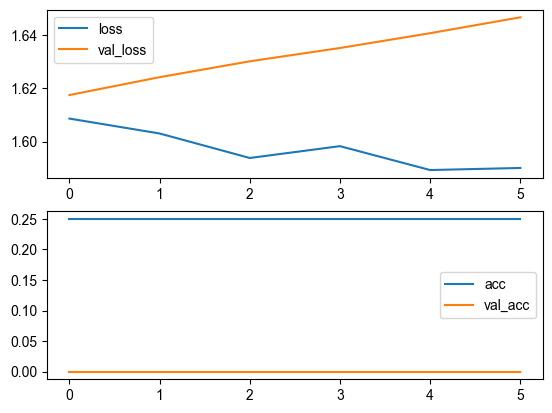

In [35]:
print('在测试集上的效果：', model.evaluate(np.array(x_test), np.array(y_test)))

# 读取关系对应表
with open('./dict.json', 'r', encoding='utf-8') as f:
    label_id_dict = json.loads(f.read())

sorted_label_id_dict = sorted(label_id_dict.items(), key=itemgetter(1))
values = [_[0] for _ in sorted_label_id_dict]

# 输出每一类的classification report
y_pred = model.predict(np.array(x_test), batch_size=32)
print(values)
#print(classification_report(np.array(y_test).argmax(axis=1), y_pred.argmax(axis=1), target_names=values))

# 绘制loss和acc图像
plt.subplot(2, 1, 1)
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
epochs = len(history.history['accuracy'])
plt.plot(range(epochs), history.history['accuracy'], label='acc')
plt.plot(range(epochs), history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.savefig("loss_acc.png")

In [ ]:
# 预测

In [49]:
import os, json
import numpy as np
from keras.models import load_model

# 加载训练效果最好的模型
model_dir = './models'
files = os.listdir(model_dir)
models_path = [os.path.join(model_dir, _) for _ in files]
best_model_path = sorted(models_path, key=lambda x: float(x.split('-')[-1].replace('.keras', '')), reverse=True)[0]
print(best_model_path)
model = load_model(best_model_path)

# 示例语句及预处理
text1 = '美国#P8-A海上巡逻机#P-8A海上巡逻机（P-8A Poseidon），是美国波音公司设计生产的新一代海上巡逻机。'
per1, per2, doc = text1.split('#')
text = '$'.join([per1, per2, doc.replace(per1, len(per1)*'#').replace(per2, len(per2)*'#')])
# print(text)


# 利用BERT提取句子特征
x_train = []
arr = tokenizer([text1], padding=True, truncation=True, max_length=10, return_tensors='pt')["input_ids"]
for i in range(len(arr)):
    x_train.append(np.array(arr[i]))

# 模型预测并输出预测结果
predicted = model.predict(np.array(x_train))
y = np.argmax(predicted[0])

with open('dict.json', 'r', encoding='utf-8') as f:
    rel_dict = json.load(f)

id_rel_dict = {v:k for k,v in rel_dict.items()}
print('原文: %s' % text1)
print('预测军事事件关系: %s' % id_rel_dict[y])

./models/per-rel-01-0.0000.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
原文: 美国#P8-A海上巡逻机#P-8A海上巡逻机（P-8A Poseidon），是美国波音公司设计生产的新一代海上巡逻机。
预测军事事件关系: 发生
